This is this sixth in a series of notebooks designed to show you how to analyze social media data. For demonstration purposes we are looking at tweets sent by CSR-related Twitter accounts -- accounts related to ethics, equality, the environment, etc. -- of Fortune 200 firms in 2013. I assume you have already downloaded the data and have completed the steps taken in <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%201%20-%20Import%20Data%2C%20Select%20Cases%20and%20Variables%2C%20Save%20DataFrame.ipynb" target="_blank">Chapter 1</a>,  <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%202%20-%20Aggregating%20and%20Analyzing%20Data%20by%20Twitter%20Account.ipynb" target="_blank">Chapter 2</a>, <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%203%20-%20Analyzing%20Twitter%20Data%20by%20Time%20Period.ipynb" target="_blank">Chapter 3</a>, <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%204%20-%20Analyzing%20Hashtags.ipynb" target="_blank">Chapter 4</a>, <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%205%20-%20Generating%20New%20Variables.ipynb" target="_blank">Chapter 5</a>, and <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%206%20-%20Producing%20a%20Summary%20Statistics%20Table%20for%20Publication.ipynb" target="blank">Chapter 6</a>. In this notebook I will take you through several basic analyses of <i>audience reaction</i> to the companies' tweets. Specifically, we'll look at the number of favorites and retweets received by each message. 

# Chapter 7: Analyzing Audience Reaction

Before diving into the code, it might help to provide some background information here on what we are trying to do. Briefly put, social media platforms are such superb technology -- from the researcher's standpoint -- precisely because they enable us to link organizations' actions (their messages) to audience reactions. Richard Waters and I make this argument in a recent article on nonprofit organizations' use of Facebook:

 - Saxton, G. D., & Waters, R. D. (2014). <a href="https://www.academia.edu/9729005/What_do_stakeholders_like_on_Facebook_Examining_public_reactions_to_nonprofit_organizations_informational_promotional_and_community-building_messages" target="_blank">What do stakeholders ‘like’ on Facebook? Examining public reactions to nonprofit organizations’ informational, promotional, and community-building messages</a>. <i>Journal of Public Relations Research, 26</i>, 280-299
 
We specifically argue (p. 281) that:

    - ...what has not been previously examined is the public’s online response to organizational relationship-building communication efforts. As a result, although the literature strongly implies that stakeholders want, for instance,  more interactive, dialogic communication, such assertions are largely untested outside the lab, primarily because web  sites, which have been the primary data source in new media studies, do not allow for the easy gathering of  stakeholder-response data....The rise of social media applications, however, presents a tremendous research  opportunity for observing how the public responds to organizational engagement efforts. Social media grants scholars  and practitioners alike the ability to examine both organizations’ dynamic communicative actions — particularly the  sending of discrete messages — and the public’s reactions to those messages. Social media platforms provide the  ability to observe the near real-time relationship between organizational actions and public reactions directly. This  observation provides access to standardized data on organizational relationship-building actions and offers the  ability to examine the effectiveness of organizations’ online stakeholder communications.
    
In our Facebook study we looked at the number of `likes`, `comments`, and `shares` of each message. Twitter has three analogous measures: `favorites`, `replies`, and `retweets`. Gathering data on the number of replies is possible but additional steps are necessary. Consqequently, in this tutorial I'll concentrate on the two easier measures: `retweets` and `favorites`. Here's an example from one of my tweets.

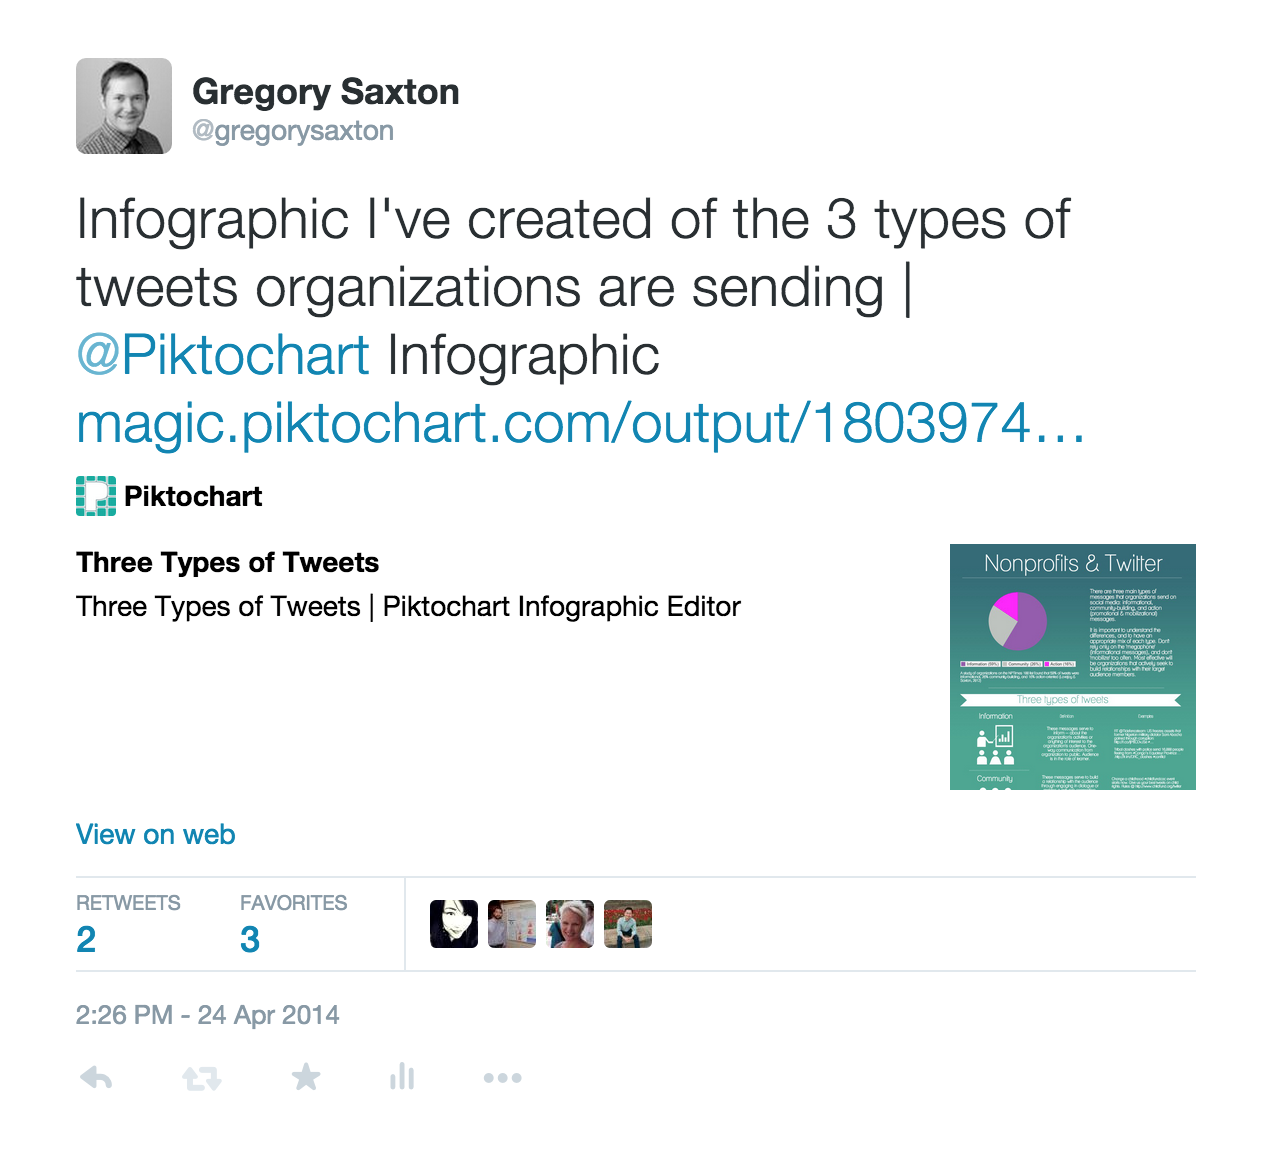

In [25]:
from IPython.display import Image
Image(width=600, filename='infographic.png')

As we can see, the tweets received a moderate amount of audience reaction: two `retweets` and three `favorites`. Those `retweets` and `favorites` are solid indicators of audience reaction. They are an excellent vehicle for examining the impact of each message. And fortunately, using the code shown in <a href="http://social-metrics.org/tutorial-list/" target="_blank">other tutorials</a>, these data were downloaded and included in our tweet-level dataset in the columns `retweet_count` and `favorite_count`. Our attention will thus be on these two variables.

<br>

## Import packages and set viewing options

As per normal, we will first import several necessary Python packages and set some options for viewing the data. As with prior chapters, we will be using the <a href="http://pandas.pydata.org/">Python Data Analysis Library,</a> or <i>PANDAS</i>, extensively for our data manipulations.

In [26]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series

In [27]:
#Set PANDAS to show all columns in DataFrame
pd.set_option('display.max_columns', None)

I'm using version 0.16.2 of PANDAS

In [28]:
pd.__version__

'0.16.2'

#### Import graphing packages

We'll be producing some figures in this tutorial so we need to import various graphing capabilities. The default Matplotlib library is solid. 

In [29]:
import matplotlib
print matplotlib.__version__

1.4.3


In [30]:
import matplotlib.pyplot as plt

In [31]:
#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*

One of the great innovations of ipython notebook is the ability to see output and graphics "inline," that is, on the same page and immediately below each line of code. To enable this feature for graphics we run the following line.

In [32]:
%matplotlib inline  

We will be using <i>Seaborn</i> to help pretty up the default Matplotlib graphics. Seaborn does not come installed with Anaconda Python so you will have to open up a terminal and run <i>pip install seaborn</i>.

In [33]:
import seaborn as sns
print sns.__version__

0.6.0


<br>The following line will set the default plots to be bigger.

In [34]:
plt.rcParams['figure.figsize'] = (15, 5)

## Read in data

In <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%204%20-%20Analyzing%20Hashtags.ipynb" target="_blank">Chapter 4</a> we created a version of the dataframe that omitted all tweets that were retweets, allowing us to focus only on original messages sent by the 41 Twitter accounts. In <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%205%20-%20Generating%20New%20Variables.ipynb" target="_blank">Chapter 5</a> we then added 6 new variables to this dataset. Let's now open this saved file. As we can see in the operations below this dataframe contains 60 variables for 26,257 tweets.

In [184]:
df = pd.read_pickle('Original 2013 CSR Tweets with 3 binary variables.pkl')
print "# of variables in dataframe:", len(df.columns)
print  "# of tweets in dataframe:", len(df)
df.head(2)

# of variables in dataframe: 60
# of tweets in dataframe: 26257


,rowid,query,tweet_id_str,inserted_date,language,coordinates,retweeted_status,created_at,month,year,content,from_user_screen_name,from_user_id,from_user_followers_count,from_user_friends_count,from_user_listed_count,from_user_favourites_count,from_user_statuses_count,from_user_description,from_user_location,from_user_created_at,retweet_count,favorite_count,entities_urls,entities_urls_count,entities_hashtags,entities_hashtags_count,entities_mentions,entities_mentions_count,in_reply_to_screen_name,in_reply_to_status_id,source,entities_expanded_urls,entities_media_count,media_expanded_url,media_url,media_type,video_link,photo_link,twitpic,num_characters,num_words,retweeted_user,retweeted_user_description,retweeted_user_screen_name,retweeted_user_followers_count,retweeted_user_listed_count,retweeted_user_statuses_count,retweeted_user_location,retweeted_tweet_created_at,Fortune_2012_rank,Company,CSR_sustainability,specific_project_initiative_area,English,RTs_binary,favorites_binary,hashtags_binary,mentions_binary,URLs_binary
0,67340,humanavitality,306897327585652736,2014-03-09 13:46:50.222857,en,NaN,NaN,2013-02-27 22:43:19.000000,2,2013,@louloushive (Tweet 2) We encourage other empl...,humanavitality,274041023,2859,440,38,25,1766,This is the official Twitter account for Human...,NaN,Tue Mar 29 16:23:02 +0000 2011,0,0,NaN,0,NaN,0,louloushive,1,louloushive,306218267737989120.00,web,NaN,nan,NaN,NaN,NaN,0,0,0,121,19,nan,NaN,NaN,nan,nan,nan,NaN,NaN,79,Humana,0,1,1.00,0,0,0,1,0
1,39454,FundacionPfizer,308616393706844160,2014-03-09 13:38:20.679967,es,NaN,NaN,2013-03-04 16:34:17.000000,3,2013,¿Sabes por qué la #vacuna contra la #neumonía ...,FundacionPfizer,188384056,2464,597,50,11,2400,Noticias sobre Responsabilidad Social y Fundac...,México,Wed Sep 08 16:14:11 +0000 2010,1,0,NaN,0,"vacuna, neumonía",2,NaN,0,NaN,nan,web,NaN,nan,NaN,NaN,NaN,0,0,0,138,20,nan,NaN,NaN,nan,nan,nan,NaN,NaN,40,Pfizer,0,1,0.00,1,0,1,0,0


## Describing Audience Reaction

Let's first describe the data for our two columns of interest. I like suppressing scientific notation in my numbers. So, if you'd rather see "0.48" than "4.800000e-01", then run the following line. Note that this does not change the actual values. 

In [36]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [38]:
df[['retweet_count','favorite_count']].describe().T
#np.round(df[['retweet_count','favorite_count']].describe(), 2).T  ##ALTERNATIVE CODE IF NOT SETTING THE FLOAT FORMAT OPTION ABOVE

,count,mean,std,min,25%,50%,75%,max
retweet_count,26257.00,3.83,42.94,0.00,0.00,1.00,2.00,3719.00
favorite_count,26257.00,1.52,15.28,0.00,0.00,0.00,1.00,1150.00


<br>We see that, on average, the `26,257` original tweets sent by the 41 accounts in 2013 receive 3.83 retweets and 1.52 favorites. 

## Correlation between Retweets and Favorites

It is worth examining the extent to which retweeting and favoriting activity are related. If the relationship is strong enough, then we might choose to simplify subsequent statistical analyses and only use one of the variables as a proxy for audience engagement. 

#### Pearson Correlation

First, let's run a pearson correlation.

In [62]:
df['retweet_count'].corr(df['favorite_count'])

0.8468685112832548

This indicates a very strong positive correlation between `retweet_count` and `favorite_count`. But let's explore a few other ways at looking at the relationship while I show you a few other PANDAS tools.

#### Cross-tabs

We can also run a cross-tabulation between the binary `(0,1)` variables `favorites_binary` and `RTs_binary`, which we created in <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%206%20-%20Producing%20a%20Summary%20Statistics%20Table%20for%20Publication.ipynb" target="blank">Chapter 6</a>. 

In [63]:
pd.crosstab(df['favorites_binary'], df['RTs_binary'])

RTs_binary,0,1
favorites_binary,,
0,10016,7511
1,1907,6823


We see that the large majority of tweets that are never retweeted are also never favorited, while most of those that are favorited are also retweeted. However, the converse is not true, partly due to the lower average frequency of favoriting compared to retweeting. But overall, it's not a perfect relationship by any means.  

To make it easier to see proportions, we can work with percentages instead. First we can show row percentages.

In [66]:
from __future__ import division  #To make sure PANDAS always returns a float
pd.crosstab(df['favorites_binary'], df['RTs_binary']).apply(lambda r: r/r.sum(), axis=1)

RTs_binary,0,1
favorites_binary,,
0,0.57,0.43
1,0.22,0.78


We can also show column percentages.

In [58]:
pd.crosstab(df['favorites_binary'], df['RTs_binary']).apply(lambda r: r/r.sum(), axis=0)

RTs_binary,0,1
favorites_binary,,
0,0.84,0.52
1,0.16,0.48


And even total percentages.

In [50]:
pd.crosstab(df['favorites_binary'], df['RTs_binary']).apply(lambda r: r/len(df), axis=1)

RTs_binary,0,1
favorites_binary,,
0,0.38,0.29
1,0.07,0.26


#### Visualizing the relationship

We can also examine the relationship between the two variables visually. Here is a scatter plot. It certainly looks like a positive relationship.

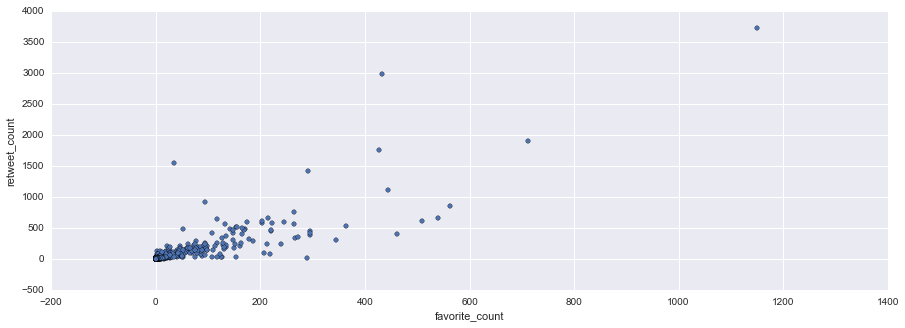

In [67]:
df.plot(kind='scatter', x='favorite_count', y='retweet_count')

<br>Recall that we are using the `Seaborn` package along with `matplotlib` to improve our graphics. As described in more detail <a href="http://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html" target="_blank">here</a>, Seaborn has some great tools for quickly visualizing the relationship between two variables. I'll show you one of them, `regplot`. This will run a scatter plot between the two variables, same as above, while also adding a regression model fit line with confidence intervals.

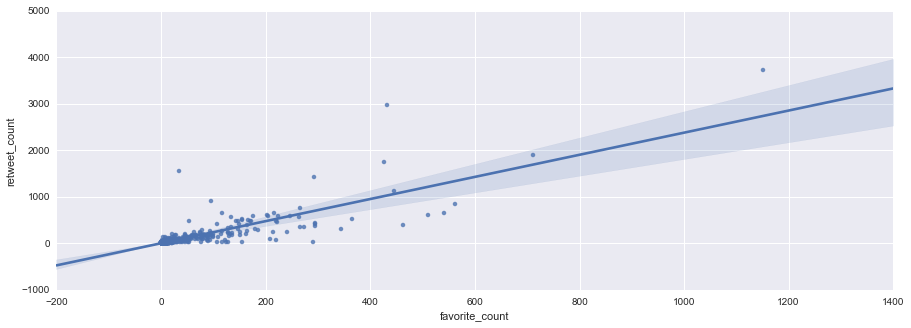

In [95]:
sns.regplot(x="favorite_count", y="retweet_count", data=df)

<br>As usual, run the following for help.

In [68]:
sns.lmplot?

We want to fix the x-axis and y-axis limits so there are no negative numbers. 

[(0, 5000), (0, 1400)]

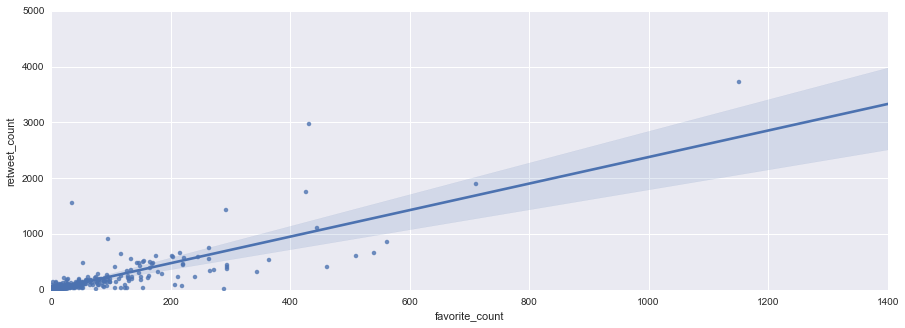

In [96]:
sns.regplot(x="favorite_count", y="retweet_count", data=df).set(xlim=(0, 1400), ylim=(0, 5000))

#LONG WAY OF WRITING ABOVE IF YOU WANT TO BREAK UP CODE
#g = sns.regplot(x="favorite_count", y="retweet_count", data=df)
#g.set(xlim=(0, 1400), ylim=(0, 5000))

<br>What we see again is a solid positive relationship between `retweet_count` and `favorites_count`. Taking all the evidence into account, it is a judgment call whether you'd want to only use one of these variables as your proxy for overall audience engagement. It would depend on the context of your research question and your particular data. For ease of presentation, let's assume you are interested only in what factors are associated with the diffusion of the organizations' messages. In this case, you'd be on solid ground limiting your investigation to retweets. Accordingly, for the remaining analyses I'll focus on exploring `retweet_count` in greater depth.

## Digging Deeper into Retweet Patterns

Let's take a look at the frequencies for `retweet_count`. 

In [142]:
df.retweet_count.value_counts()

0       11923
1        5583
2        2908
3        1744
4        1067
5         710
6         470
7         339
8         236
9         174
10        122
11        120
12        103
13         68
14         62
15         42
16         42
18         38
17         38
19         27
20         26
23         18
25         17
22         16
21         15
26         13
27         13
24         12
30         11
33         11
        ...  
198         1
310         1
342         1
3719        1
71          1
135         1
231         1
247         1
359         1
471         1
655         1
72          1
120         1
200         1
216         1
232         1
408         1
648         1
185         1
201         1
233         1
505         1
585         1
1113        1
74          1
122         1
282         1
330         1
91          1
56          1
dtype: int64

<br>Above we see that `11,923` tweets receive `zero` retweets. Let's run the frequencies again (showing only the first 10 values), this time with percentages.

In [110]:
df.retweet_count.value_counts(normalize=True)[:10]

0   0.45
1   0.21
2   0.11
3   0.07
4   0.04
5   0.03
6   0.02
7   0.01
8   0.01
9   0.01
dtype: float64

<br>45.41% of original tweets do not receive a single RT. If you want to run this manually you can do the following:

In [143]:
11923/len(df['retweet_count'])

0.4540884335605743

or

In [144]:
len(df[df['retweet_count'] < 1])/len(df['retweet_count'])

0.4540884335605743

or

In [145]:
sum(df['retweet_count'] < 1)/len(df['retweet_count'])

0.45408843356057432

<br>Another `5,583` tweets receive a single retweet.

In [148]:
len(df[df['retweet_count'] == 1])
#sum(df['retweet_count'] == 1)    #SLIGHTLY SHORTER WAY

5583

Thus almost precisely two-thirds of the tweets receive 1 retweet or fewer.

In [157]:
len(df[df['retweet_count']<2])/len(df['retweet_count'])

0.6667174467760978

Recall that in <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%204%20-%20Analyzing%20Hashtags.ipynb" target="_blank">Chapter 4</a> we found evidence that hashtag use did not follow a `normal` distribution but rather a `power law` distribution. A quick look at the above frequencies tables suggests that the distribution of retweets also likely approximates a power law distribution. There will thus be many tweets that are retweeted infrequently and a relatively small number that are retweeted a lot. Before plotting the distribution let's dig a bit deeper into the more successful tweets.

The average # of RTs for tweets that get retweeted at least once is `7.02`

In [155]:
df[df['retweet_count'] > 0].retweet_count.describe()

count   14334.00
mean        7.02
std        57.92
min         1.00
25%         1.00
50%         2.00
75%         4.00
max      3719.00
Name: retweet_count, dtype: float64

<br>The average # of RTs for original tweets with a greater than average # of RTs is `20.48`

In [245]:
df[df['retweet_count'] > df['retweet_count'].mean()].retweet_count.describe()

count   4099.00
mean      20.48
std      107.13
min        4.00
25%        4.00
50%        6.00
75%       10.00
max     3719.00
Name: retweet_count, dtype: float64

<br>Only `4,099` tweets (or `15.6%`) receive more retweets than average. Definitely not a `normal distribution`.

In [172]:
print sum(df['retweet_count'] > df['retweet_count'].mean())
print sum(df['retweet_count'] > df['retweet_count'].mean())/len(df['retweet_count'])

4099
0.156110751419


<br>Only `2,322` tweets (or `8.9%`) receive more than 5 retweets.

In [174]:
print sum(df['retweet_count'] > 5)
print sum(df['retweet_count'] > 5)/len(df['retweet_count'])

2322
0.0884335605743


<br>Only `981` tweets (or `3.7%`) receive more than 10 retweets.

In [175]:
print sum(df['retweet_count'] > 10)
print sum(df['retweet_count'] > 10)/len(df['retweet_count'])

981
0.037361465514


<br>
## Graphing `retweet_count`

First let's take a look at what we see in the default plot.

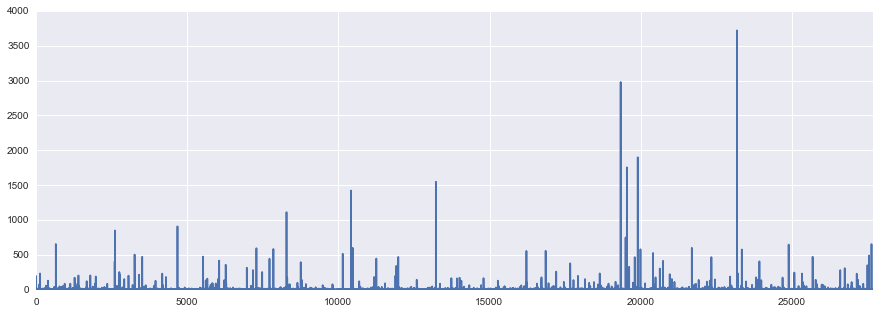

In [185]:
df['retweet_count'].plot(kind='line')

<br>That's helpful but not very. Let's sort the dataframe. For help run the question mark.

In [186]:
DataFrame.sort?

In [187]:
df = df.sort(['retweet_count'], ascending=False)

In [188]:
df[['retweet_count']].head()

,retweet_count
23181,3719
19335,2979
19900,1899
19540,1756
13224,1549


<br>Now that it's sorted let's plot it again. We'll omit the tick labels because adding `26,257` labels would be unwieldy. :)

(array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
         4000.]), <a list of 9 Text yticklabel objects>)

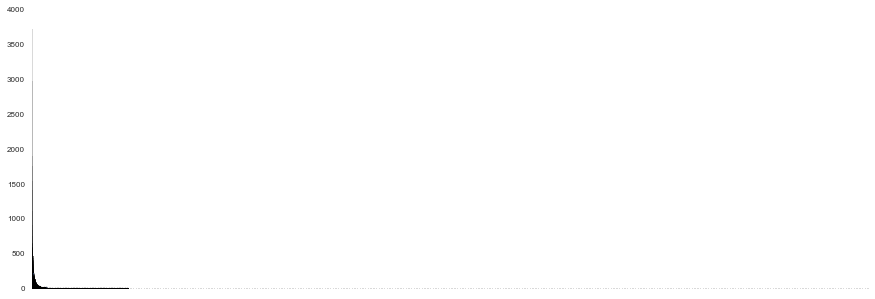

In [182]:
bar_plot = df['retweet_count'].plot(kind='bar')
bar_plot.set_xticklabels('')
bar_plot.set_xlabel('')
yticks(fontsize = 8)

<br>Again, this plot is helpful -- more helpful than the prior version -- but it is still far from ideal. The problem is that the distribution is so skewed and covers a broad range (from `0` to `3,719` retweets) that everything looks squished. So let's split the data up in order to see the distribution more clearly. I've chosen to separate the tweets with more than 50 retweets (`n=188`) from those with 50 or fewer retweets (`n=26,029`).

In [194]:
df50 = df[df['retweet_count'] < 51]
df50 = df50.sort(columns='retweet_count', axis=0, ascending=False)
print len(df50)

26069


In [195]:
df50plus = df[df['retweet_count'] > 50]
df50plus = df50plus.sort(columns='retweet_count', axis=0, ascending=False)
print len(df50plus)

188


<br>Now let's plot the two respective bar graphs.

(array([  0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 6 Text yticklabel objects>)

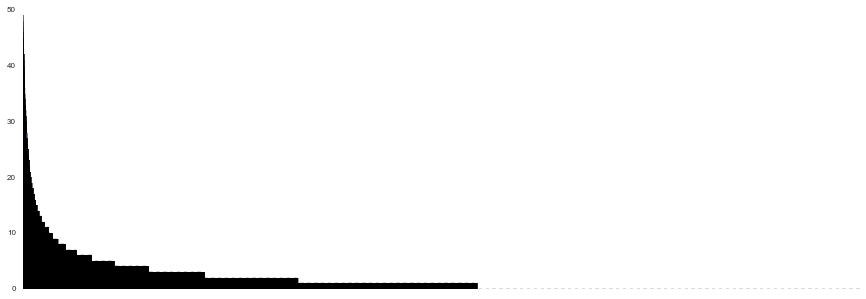

In [197]:
bar_plot = df50['retweet_count'].plot(kind='bar')
bar_plot.set_xticklabels('')
bar_plot.set_xlabel('')
yticks(fontsize = 8)

(array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
         4000.]), <a list of 9 Text yticklabel objects>)

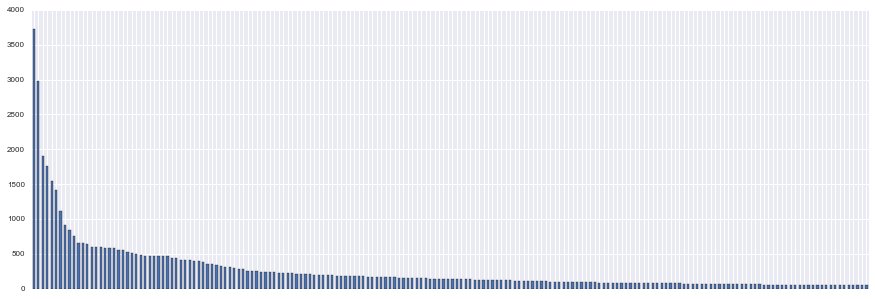

In [198]:
bar_plot = df50plus['retweet_count'].plot(kind='bar')
bar_plot.set_xticklabels('')
bar_plot.set_xlabel('')
yticks(fontsize = 8)

<br>Neither bar graph is very pretty, but we only wanted to get a quick look at the distribution. Both plots display the same general shape, with a quick drop-off from the 'winners' on the left-hand side to the relative 'losers' on the right-hand side. To get a clear look at the distribution, though, we should turn to histograms.

In [204]:
pd.set_option('display.mpl_style', 'default') # MPL style
plt.rcParams['figure.figsize'] = (15, 5)

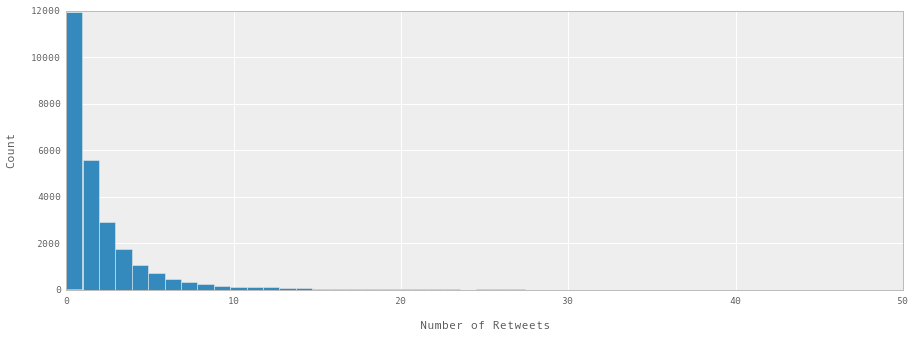

In [214]:
density_plot = df50.retweet_count.hist(bins=50)
density_plot.set_ylabel('Count', labelpad=15)
density_plot.set_xlabel('Number of Retweets', labelpad=15)
savefig('histogram - 26069 least RT-ed-mpl.png', bbox_inches='tight', dpi=300, format='png')

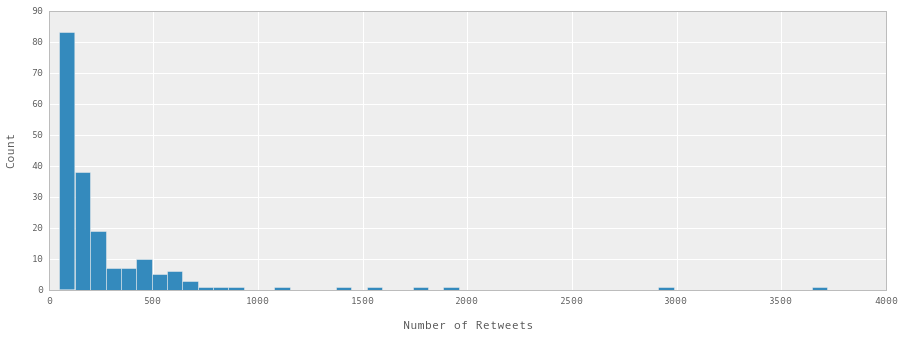

In [208]:
density_plot = df50plus.retweet_count.hist(bins=50)
density_plot.set_ylabel('Count', labelpad=15)
density_plot.set_xlabel('Number of Retweets', labelpad=15)
savefig('histogram - 188 most RT-ed-mpl.png', bbox_inches='tight', dpi=300, format='png')

<br>Both histrograms show the markedly non-normal nature of the distribution of the data. Whether we look at the `188` most-heavily retweeted tweets (those with more than 50 retweets) or the `26,069` less heavily retweeted messages, the pattern is the same. If you want more evidence, let's differentiate at 100 retweets and re-plot.

In [229]:
df100 = df[df['retweet_count'] < 101]
df100 = df100.sort(columns='retweet_count', axis=0, ascending=False)
print len(df100)

26138


In [230]:
df100plus = df[df['retweet_count'] > 100]
df100plus = df100plus.sort(columns='retweet_count', ascending=False, axis=0)
print len(df100plus)

119


<br>Let's tweak the plots by adding a line indicating the mean value within each group.

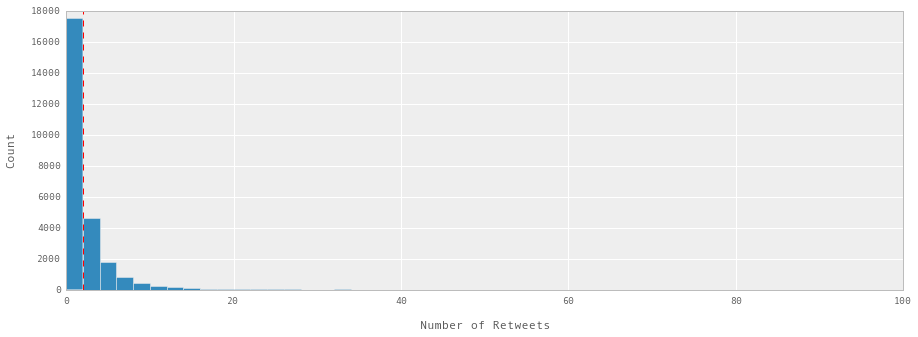

In [231]:
density_plot = df100.retweet_count.hist(bins=50)
density_plot.set_ylabel('Count', labelpad=15)
density_plot.set_xlabel('Number of Retweets', labelpad=15)
plt.axvline(df100['retweet_count'].mean(), color='r', linestyle='dashed', linewidth=1)
savefig('histogram - 26138 least RT-ed-mpl.png', bbox_inches='tight', dpi=300, format='png')

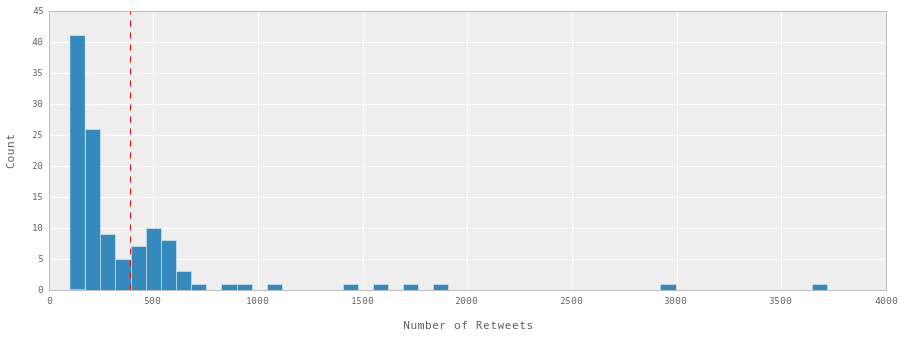

In [232]:
density_plot = df100plus.retweet_count.hist(bins=50)
density_plot.set_ylabel('Count', labelpad=15)
density_plot.set_xlabel('Number of Retweets', labelpad=15)
plt.axvline(df100plus['retweet_count'].mean(), color='r', linestyle='dashed', linewidth=1)
savefig('histogram - 119 most RT-ed-mpl.png', bbox_inches='tight', dpi=300, format='png')

### Versions of Histograms with Different Matplotlib Styles

Let's end by running our histograms in a few other styles. 

In [243]:
mpl.style.available

[u'dark_background', u'bmh', u'grayscale', u'ggplot', u'fivethirtyeight']

#### ggplot style

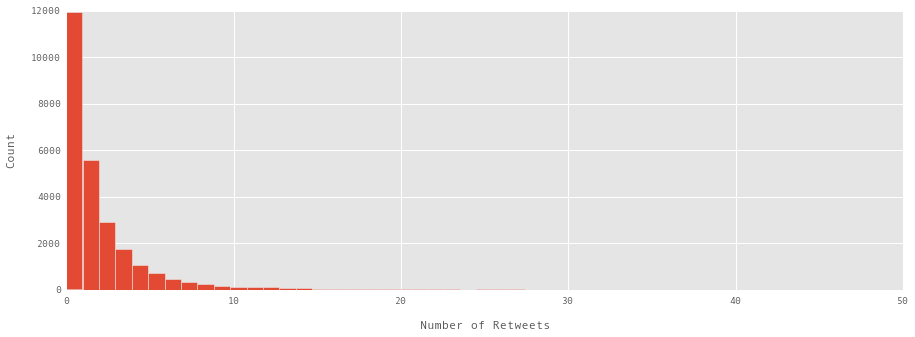

In [239]:
mpl.style.use('ggplot')
density_plot = df50.retweet_count.hist(bins=50)
density_plot.set_ylabel('Count', labelpad=15)
density_plot.set_xlabel('Number of Retweets', labelpad=15)
savefig('histogram - 26069 least RT-ed - ggplot style.png', bbox_inches='tight', dpi=300, format='png')

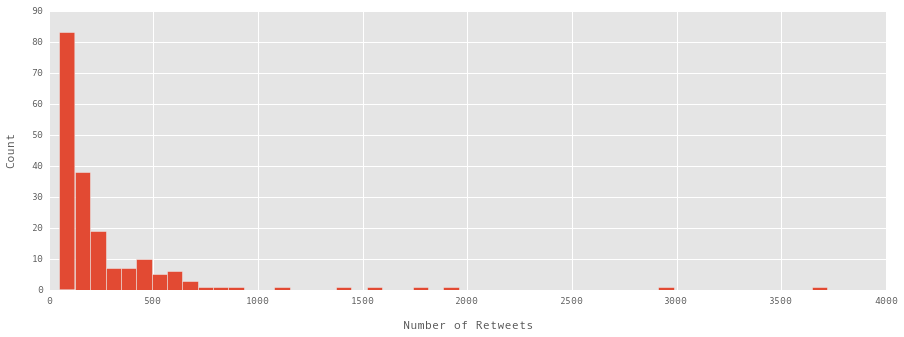

In [240]:
density_plot = df50plus.retweet_count.hist(bins=50)
density_plot.set_ylabel('Count', labelpad=15)
density_plot.set_xlabel('Number of Retweets', labelpad=15)
savefig('histogram - 188 most RT-ed.png - ggplot style', bbox_inches='tight', dpi=300, format='png')

#### 538 style

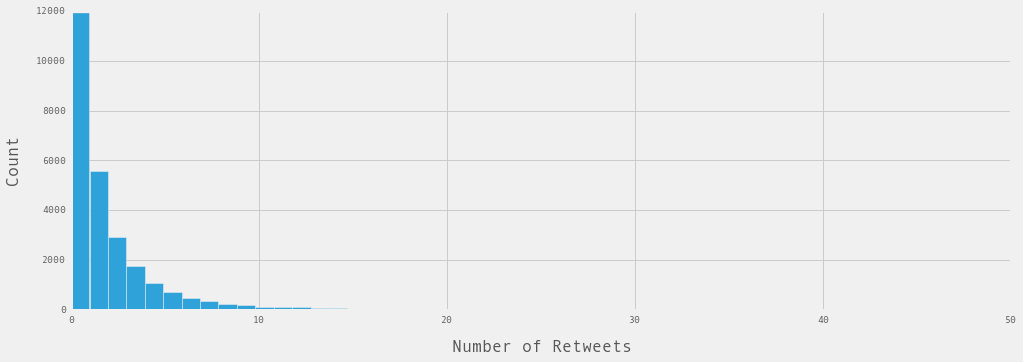

In [241]:
mpl.style.use('fivethirtyeight')
density_plot = df50.retweet_count.hist(bins=50)
density_plot.set_ylabel('Count', labelpad=15)
density_plot.set_xlabel('Number of Retweets', labelpad=15)
savefig('histogram - 26069 least RT-ed - 538.png', bbox_inches='tight', dpi=300, format='png')

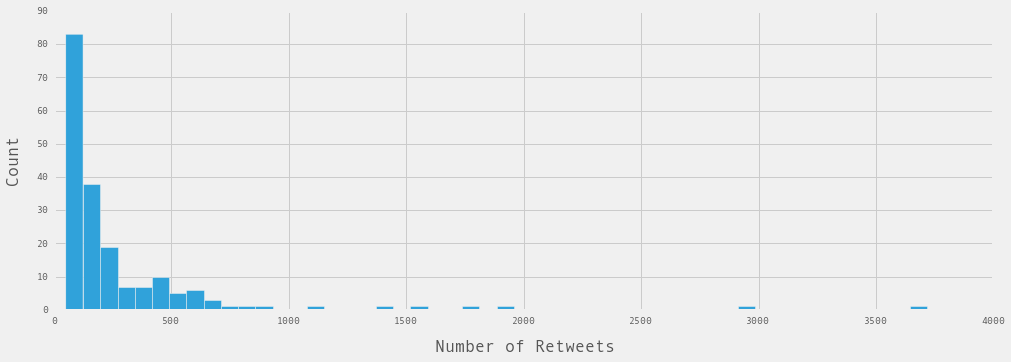

In [242]:
density_plot = df50plus.retweet_count.hist(bins=50)
density_plot.set_ylabel('Count', labelpad=15)
density_plot.set_xlabel('Number of Retweets', labelpad=15)
savefig('histogram - 188 most RT-ed - 538.png', bbox_inches='tight', dpi=300, format='png')

<br>In this tutorial we have taken an in-depth look at two measures of audience reaction -- `retweet_count` and `favorite_count`. Such variables are excellent choices for the dependent variable in your statistical analyses. In the next tutorial I'll provide an overview of how to test your hypotheses using logistic regression.

For more Notebooks as well as additional Python and Big Data tutorials, please visit http://social-metrics.org or follow me on Twitter <a href='https://twitter.com/gregorysaxton'>@gregorysaxton</a><br>